In [1]:
'''Informatique commune Concours Centrale 2022'''

'Informatique commune Concours Centrale 2022'

In [6]:
#Q1
circuit=["A", "G", "A", "G", "A", "D", "A", "G", "A", "G", "A", "A", "G", "A"]

def longueur1(c:[str], d:int) -> int:
    counter=0;
    for i in c:
        if i=="A":
            counter+=1
    return d*counter

longueur1(circuit, 2)

16

In [12]:
#Q2
circuit=["A", "A", "G", "D", "G", "G", "G", "A"]

def representation_minimale(c:[str]) -> [str]:
    virages = [[], ["G"], ["G", "G"], ["D"]]
    nbg = 0
    res = []
    for e in c: 
        if e == "A":
            res.extend(virages[nbg])
            nbg = 0
            res.append("A")
        elif e == "G":
            nbg = (nbg + 1) % 4
        else: 
            nbg = (nbg - 1) % 4
    res.extend(virages[nbg])
    return res

print(representation_minimale(circuit));
""" nbg représente le nombre de virage à gauche """

['A', 'A', 'D', 'A']


' nbg représente le nombre de virage à gauche '

In [11]:
#Q3
"""La fonction representation minimale a pour but de simplifier la représentation du circuit."""

In [47]:
#Q4
circuit1=["A", "G", "D", "G", "A", "D", "A", "G", "A", "G", "A", "A", "G", "A"]

def contient_demi_tour1(c:[str]) -> bool:
    print("circuit initiale :")
    print(c)
    c = representation_minimale(c)
    print("circuit minimale :")
    print(c)
    l = len (c)
    res = False
    for ii in range (0, l-1):
        if (c[ii] != "A"):
            if c[ii] == c[ii+1] : res = True; break   
    if res : print ("demi-tour à la position : "+str(ii))
    return res
contient_demi_tour1(circuit1)

circuit initiale :
['A', 'G', 'D', 'G', 'A', 'D', 'A', 'G', 'A', 'G', 'A', 'A', 'G', 'A']
circuit minimale :
['A', 'G', 'A', 'D', 'A', 'G', 'A', 'G', 'A', 'A', 'G', 'A']


False

In [60]:
#Q5
circuit1=["A", "G", "A", "G", "A", "D", "A", "G", "A", "G", "A", "A", "G", "A"]
def est_ferme1(c:[str]):
    c = representation_minimale(c)
    orientation = 0
    coord = [[0], [0]]
    res= True
    position = [0, 0]
    for e in c:
        if e == "G":
            orientation = (orientation + 1) % 4 
        if e == "D":
            orientation = (orientation - 1) % 4
        if e == "A":
            position[orientation % 2] =  position[orientation % 2] + (-1)**(2 if orientation <= 1 else 1 )
            coord[orientation % 2].append(position[orientation % 2])
            coord[(orientation + 1) % 2].append(position[(1 + orientation) % 2])
    print(position)
    if (orientation == 0): 
        if (position == [0,0]):
            return res
        else:
            res = False
    else: 
        res = False
    return res

print(est_ferme1(circuit1))



'''
if orientation == 0 :
    position[0]+=1
if orientation == 1 :
    position[1]+=1
if orientation == 2 :
    position[0]-=1
if orientation == 3 :
    position[1]-=1
'''


[0, 0]
True


'\nif orientation == 0 :\n    position[0]+=1\nif orientation == 1 :\n    position[1]+=1\nif orientation == 2 :\n    position[0]-=1\nif orientation == 3 :\n    position[1]-=1\n'

[[0, 1, 1, 0, 0, -1, -1, -1, 0], [0, 0, 1, 1, 2, 2, 1, 0, 0]]
[[0, 0], [1, 0], [1, 1], [0, 1], [0, 2], [-1, 2], [-1, 1], [-1, 0], [0, 0]]
circuit initiale :
['A', 'G', 'A', 'G', 'A', 'D', 'A', 'G', 'A', 'G', 'A', 'A', 'G', 'A']
circuit minimale :
['A', 'G', 'A', 'G', 'A', 'D', 'A', 'G', 'A', 'G', 'A', 'A', 'G', 'A']
[0, 0]


True

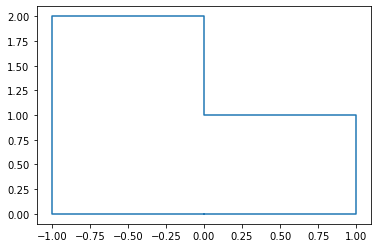

In [93]:
#Q6
#circuit1=["A", "G", "A","A", "G", "A", "D", "A", "G", "A", "G", "A", "A", "A", "A", "G", "A", "A", "D","A", "D", "A", "A", "D", "A", "A", "D", "A"]
circuit1=["A", "G", "A", "G", "A", "D", "A", "G", "A", "G", "A", "A","G", "A"]
import matplotlib.pyplot as plt

def coord_position (c:[str]):
    c = representation_minimale(c)
    orientation = 0
    coord = [[0], [0]]
    position = [0, 0]
    ensemble_position = [[0,0]]
    for e in c:
        if e == "G":
            orientation = (orientation + 1) % 4 
        if e == "D":
            orientation = (orientation - 1) % 4
        if e == "A":
            position[orientation % 2] =  position[orientation % 2] + (-1)**(2 if orientation <= 1 else 1 )
            coord[orientation % 2].append(position[orientation % 2])
            coord[(orientation + 1) % 2].append(position[(1 + orientation) % 2])
            ensemble_position.append([position[0], position[1]])
    return coord, ensemble_position
    
coord,  ensemble_position = coord_position(circuit1)
print(coord)
print(ensemble_position)
plt.plot(coord[0], coord[1])


def circuit_convenable1(c:[str]) -> bool :
    res = True
    if (not (contient_demi_tour1(c)) and est_ferme1(c)):
        coord, ensemble_position = coord_position(c)
        new_ensemble_position = ensemble_position[:-1]
        l = len(new_ensemble_position)
        for ii in range (0, l):
            for jj in  range(0, l) :
                if not (jj == ii) :
                    if (new_ensemble_position[ii] == new_ensemble_position[jj]): res = False   
    else: res = False
    return res

circuit_convenable1(circuit1)

In [5]:
#Q7 
import turtle

circuit1=["A", "G", "A", "G", "A", "D", "A", "G", "A", "G", "A", "A","G", "A"]
def dessine_circuit1(c:[str], d:int) -> None :
    for e in c :
        if e == "A":
            turtle.forward(d)
        elif e == "G":
            turtle.left(90)
        elif e == "D":
            turtle.right(90)
    turtle.done()
dessine_circuit1(circuit1, 100)